C:\Users\Eszti\Downloads\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Eszti\Downloads\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


DUPLAZÁR regressziós egyenlete: y = 0.8341 * x + -1598.8341


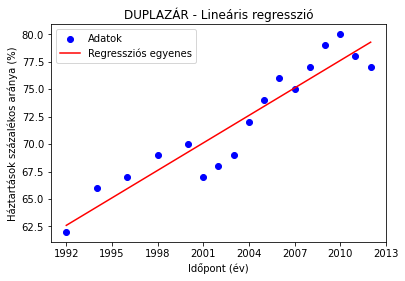

BIZTONSÁGI LÁNC regressziós egyenlete: y = -1.3296 * x + 2701.3893


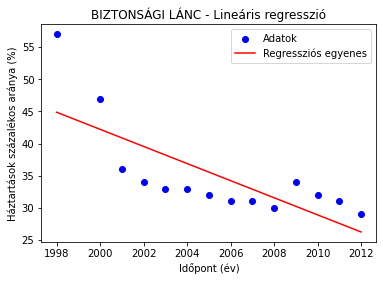

ABLAKZÁR regressziós egyenlete: y = 1.5949 * x + -3120.5949


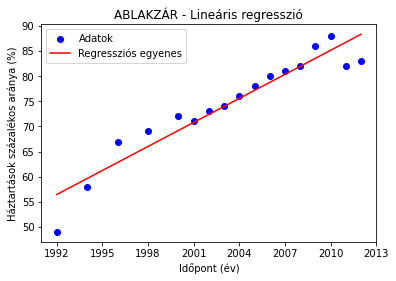

RIASZTÓ regressziós egyenlete: y = 0.7367 * x + -1450.2367


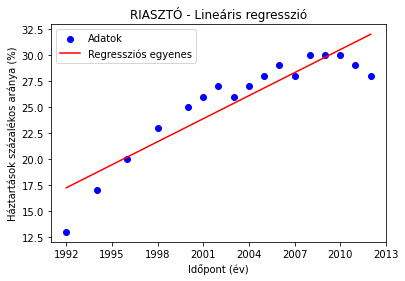

ÁLRIASZTÓ regressziós egyenlete: y = 0.1728 * x + -341.7858


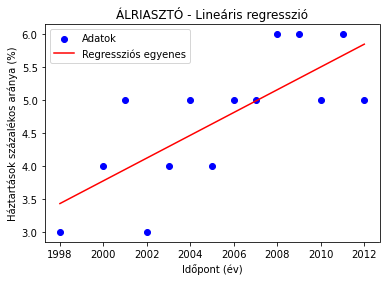

BELTÉRI LÁMPA regressziós egyenlete: y = 0.1124 * x + -202.3195


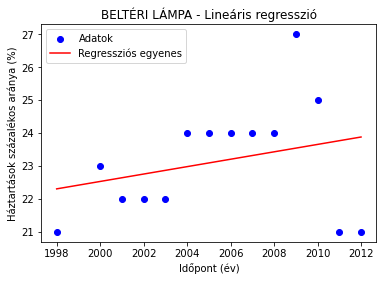

KÜLTÉRI LÁMPA regressziós egyenlete: y = 0.6260 * x + -1214.3266


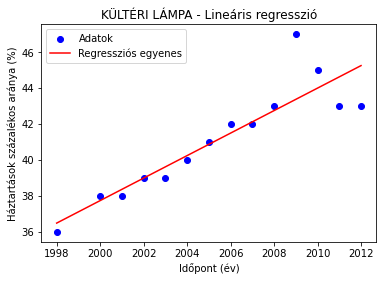

ABLAKRÁCSOK regressziós egyenlete: y = -0.3049 * x + 615.1810


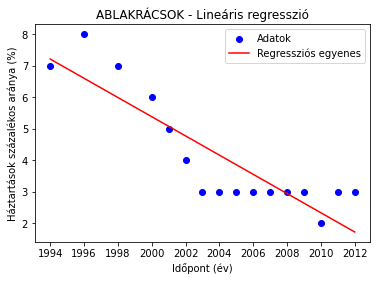

In [2]:
#beépített függvénnyel lineáris regresszió
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


#excel fájl beolvasása
df = pd.read_excel('regresszio_adatok.xlsx') 

#oszlopok listája, amikre elkészítjük a lineáris regressziót
berendezesek = ['DUPLAZÁR', 'BIZTONSÁGI LÁNC', 'ABLAKZÁR', 
                'RIASZTÓ', 'ÁLRIASZTÓ', 'BELTÉRI LÁMPA', 
                'KÜLTÉRI LÁMPA', 'ABLAKRÁCSOK']

#lineáris regresszió minden berendezésre külön
for berendezes in berendezesek:
    #kiválasztjuk az érvényes adatokat (nem NaN értékek)
    adatok = df[['IDŐPONT', berendezes]].dropna()

    X = adatok[['IDŐPONT']]  #x koordináták
    y = adatok[berendezes]   #y koordináták

    #lineáris regresszió
    model = LinearRegression()
    model.fit(X, y)

    #eredmények
    print(f"{berendezes} regressziós egyenlete: y = {model.coef_[0]:.4f} * x + {model.intercept_:.4f}")

    #átalakítás 1D tömbbé
    X_flat = X.values.flatten()
    #ábrázolás
    plt.figure()
    plt.scatter(X_flat, y, color='blue', label='Adatok')
    plt.plot(X_flat, model.predict(X), color='red', label='Regressziós egyenes')
    plt.title(f"{berendezes} - Lineáris regresszió")
    plt.xlabel('Időpont (év)')
    plt.ylabel('Háztartások százalékos aránya (%)')
    plt.legend()

    #egész számok legyenek az x tengelyen
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.show()


In [2]:
#lineáris regresszió és t-próba kézzel kiszámítva
import pandas as pd
import numpy as np
from scipy.stats import t
from sklearn.linear_model import LinearRegression

#excel fájl beolvasása
df = pd.read_excel('regresszio_adatok.xlsx') 

#oszlopok listája, amikre elkészítjük a lineáris regressziót
berendezesek = ['DUPLAZÁR', 'BIZTONSÁGI LÁNC', 'ABLAKZÁR', 
                'RIASZTÓ', 'ÁLRIASZTÓ', 'BELTÉRI LÁMPA', 
                'KÜLTÉRI LÁMPA', 'ABLAKRÁCSOK']

alpha = 0.05 #szignifikanciaszint

for berendezes in berendezesek:
    adatok = df[['IDŐPONT', berendezes]].dropna()
    X = adatok['IDŐPONT'].values
    y = adatok[berendezes].values
    n = len(X)
    
    #lineáris regresszió kiszámítása
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    a_hat = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
    b_hat = y_mean - a_hat * X_mean
    
    #t-próba
    Szamlalo = np.sqrt((n - 2) * np.sum((X - X_mean)**2))
    Nevezo = np.sqrt(np.sum((y - (a_hat * X + b_hat))**2))
    t_stat = a_hat * Szamlalo / Nevezo

    #p-érték - egyoldali teszt
    if t_stat > 0:
        p_value = 1 - t.cdf(t_stat, df=n-2)  #jobb oldali teszt
    else:
        p_value = t.cdf(t_stat, df=n-2)  #bal oldali teszt

    #kritikus t-érték (egyoldali teszt)
    t_crit_r = t.ppf(1 - alpha, df=n-2)
    t_crit_l = t.ppf(alpha, df=n-2)
    if t_stat > 0:
        t_crit = t_crit_r
    else:
        t_crit = t_crit_l

    #nullhipotézis
    if t_stat > t_critical_r and t_stat > 0:
        h_0 = "elutasítjuk a nullhipotézist - növekedés figyelhető meg"
    elif t_stat < t_critical_l and t_stat < 0:
        h_0 = "elutasítjuk a nullhipotézist - csökkenés figyelhető meg"
    else:
        h_0 = "elfogadjuk a nullhipotézist - stagnál a függvény"

    #eredmények kiírása
    print(f"{berendezes} regressziós egyenlet: y = {a_hat:.4f}x + {b_hat:.4f}")
    print(f"t = {t_stat:.4f}, t_crit = {t_crit:.4f}, p-érték = {p_value:.4f}, Döntés: {h_0}\n")


DUPLAZÁR regressziós egyenlet: y = 0.8341x + -1598.8341
t = 10.5365, t_crit = 1.7531, p-érték = 0.0000, Döntés: elutasítjuk a nullhipotézist - növekedés figyelhető meg

BIZTONSÁGI LÁNC regressziós egyenlet: y = -1.3296x + 2701.3893
t = -3.8857, t_crit = -1.7823, p-érték = 0.0011, Döntés: elutasítjuk a nullhipotézist - csökkenés figyelhető meg

ABLAKZÁR regressziós egyenlet: y = 1.5949x + -3120.5949
t = 11.6593, t_crit = 1.7531, p-érték = 0.0000, Döntés: elutasítjuk a nullhipotézist - növekedés figyelhető meg

RIASZTÓ regressziós egyenlet: y = 0.7367x + -1450.2367
t = 8.5715, t_crit = 1.7531, p-érték = 0.0000, Döntés: elutasítjuk a nullhipotézist - növekedés figyelhető meg

ÁLRIASZTÓ regressziós egyenlet: y = 0.1728x + -341.7858
t = 3.9126, t_crit = 1.7823, p-érték = 0.0010, Döntés: elutasítjuk a nullhipotézist - növekedés figyelhető meg

BELTÉRI LÁMPA regressziós egyenlet: y = 0.1124x + -202.3195
t = 0.9994, t_crit = 1.7823, p-érték = 0.1687, Döntés: elfogadjuk a nullhipotézist - stagn

In [2]:
#kétoldali t-próba
import pandas as pd
import numpy as np
from scipy.stats import t
from sklearn.linear_model import LinearRegression

#excel fájl beolvasása
df = pd.read_excel('regresszio_adatok.xlsx')

#oszlopok listája, amikre elkészítjük a lineáris regressziót
berendezesek = ['DUPLAZÁR', 'BIZTONSÁGI LÁNC', 'ABLAKZÁR', 
                'RIASZTÓ', 'ÁLRIASZTÓ', 'BELTÉRI LÁMPA', 
                'KÜLTÉRI LÁMPA', 'ABLAKRÁCSOK']

alpha = 0.05  #szignifikanciaszint

for berendezes in berendezesek:
    adatok = df[['IDŐPONT', berendezes]].dropna()
    X = adatok['IDŐPONT'].values
    y = adatok[berendezes].values
    n = len(X)
    
    #lineáris regresszió kiszámítása
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    a_hat = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
    b_hat = y_mean - a_hat * X_mean
    
    #t-próba
    Szamlalo = np.sqrt((n - 2) * np.sum((X - X_mean)**2))
    Nevezo = np.sqrt(np.sum((y - (a_hat * X + b_hat))**2))
    t_stat = a_hat * Szamlalo / Nevezo

    #p-érték - kétoldali teszt
    p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-2))  # Kétoldali p-érték

    #kritikus t-érték (kétoldali teszt)
    t_critical = t.ppf(1 - alpha / 2, df=n-2)  # Kétoldali teszt esetén alpha/2

    #nullhipotézis
    if abs(t_stat) > t_critical:
        h_0 = "elutasítjuk a nullhipotézist - az a együttható nem nulla"
    else:
        h_0 = "elfogadjuk a nullhipotézist - az a együttható nulla"

    #eredmények kiírása
    print(f"{berendezes} regressziós egyenlet: y = {a_hat:.4f}x + {b_hat:.4f}")
    print(f"t = {t_stat:.4f}, t_crit = {t_critical:.4f}, p-érték = {p_value:.4f}, Döntés: {h_0}\n")


DUPLAZÁR regressziós egyenlet: y = 0.8341x + -1598.8341
t = 10.5365, t_crit = 2.1314, p-érték = 0.0000, Döntés: elutasítjuk a nullhipotézist - az a együttható nem nulla

BIZTONSÁGI LÁNC regressziós egyenlet: y = -1.3296x + 2701.3893
t = -3.8857, t_crit = 2.1788, p-érték = 0.0022, Döntés: elutasítjuk a nullhipotézist - az a együttható nem nulla

ABLAKZÁR regressziós egyenlet: y = 1.5949x + -3120.5949
t = 11.6593, t_crit = 2.1314, p-érték = 0.0000, Döntés: elutasítjuk a nullhipotézist - az a együttható nem nulla

RIASZTÓ regressziós egyenlet: y = 0.7367x + -1450.2367
t = 8.5715, t_crit = 2.1314, p-érték = 0.0000, Döntés: elutasítjuk a nullhipotézist - az a együttható nem nulla

ÁLRIASZTÓ regressziós egyenlet: y = 0.1728x + -341.7858
t = 3.9126, t_crit = 2.1788, p-érték = 0.0021, Döntés: elutasítjuk a nullhipotézist - az a együttható nem nulla

BELTÉRI LÁMPA regressziós egyenlet: y = 0.1124x + -202.3195
t = 0.9994, t_crit = 2.1788, p-érték = 0.3373, Döntés: elfogadjuk a nullhipotézist - a